# **Libraries**

*Set* your local "google_drive_path" that you uploaded the code in it

In [ ]:
Your_google_drive_path="/content/drive/MyDrive/DeepGDPaper"

In [ ]:
from numpy import argmax
import random
import seaborn as sbn
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import ones
from scipy import stats
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import  array
import math
from keras.utils import np_utils
from keras.models import Sequential
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA as sklearnPCA
import copy
import time
from keras import backend as K
import argparse
import shutil
import warnings
import keras.backend as KeyboardInterrupt
from keras.regularizers import l2
from keras.models import load_model, Model
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.datasets import mnist, cifar10 , fashion_mnist, cifar100
import sys
from numpy.core.defchararray import array
sys.path.append('..')


!pwd
import os
os.chdir(str(Your_google_drive_path))
!pwd

!pip install pymoo
from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.crossover import Crossover
from pymoo.core.sampling import Sampling

/content
/content/drive/MyDrive/sadl11
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.8/566.8 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 KB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.7 MB/s eta 0:00:00
  Preparing m

## **Dataset and Models**

In [ ]:
############################################## Dataset $ model  ########################################################################
#############################################Function description#######################################################################

#________________________________________________(dataset)___________________________________________________________
#It takes the name of the dataset , and corresponding model from the user then it preprocess the dataset and load the model.
#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset

#Normalization
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet1":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="LeNet5":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    ##VGG feature extaction (4068)
    ##rank of features (2476)
    #You can use the stored verion or call vgg function to extract features(to do so comment out the second line)
    # MNIST_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    _,MNIST_VGG=vgg16_features_GD("mnist")
    features_vgg=MNIST_VGG
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)

  if arg=="Fashion_mnist":
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("Fashion_mnist")
    if model_name=="LeNet4":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      y_test = np_utils.to_categorical(y_test, 10)
      y_test=np.argmax(y_test, axis=1)  
      y_train = np_utils.to_categorical(y_train, 10)

  
  if arg=="SVHN":
    train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
    test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
    x_train = np.array(train_raw['X'])
    x_test = np.array(test_raw['X'])
    y_train = train_raw['y']
    y_test = test_raw['y']
    x_train = np.moveaxis(x_train, -1, 0)
    x_test = np.moveaxis(x_test, -1, 0)
    x_test= x_test.reshape (-1,32,32,3)
    x_train= x_train.reshape (-1,32,32,3)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("SVHN")
    if model_name=="LeNet5":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      lb = LabelBinarizer()
      y_train = lb.fit_transform(y_train)
      y_test = lb.fit_transform(y_test)
      y_test=np.argmax(y_test, axis=1)

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="ResNet20":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
  
    #VGG feature extaction (4068)
    #rank of features (3845)
    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    # Cifar_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    _,Cifar_VGG=vgg16_features_GD("cifar10")
    features_vgg=Cifar_VGG
    
    y_test = np_utils.to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)  
    y_train = np_utils.to_categorical(y_train, 10)
  
  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model


## **Feature Extraction**

In [ ]:
#________________________________________________(vgg16_features_GD)___________________________________________________________
#It needs the name of the dataset , then it extract the features of this datasets by using VGG16 (the internal layer: 'block5_conv3') 
#to have enough number of features for calculating the GD (geometric diversity score)

#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Original Feature Matrix of test inputs of the given dataset (features)
#______________________2- the noramlized version of feature matrix between 0 and 1 (X_scf)


def vgg16_features_GD(arg):

  CLIP_MIN = -0.5
  CLIP_MAX = 0.5
    # lb = LabelBinarizer()
    # train_labels = lb.fit_transform(train_labels)
    # test_labels = lb.fit_transform(test_labels)
  if (arg=="cifar10" or arg=="cifar100" or arg=="SVHN"):
    if(arg=="cifar10"):
      (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    if(arg=="cifar100"):
      (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    if (arg=="SVHN"):
      train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
      test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
      x_train = np.array(train_raw['X'])
      x_test = np.array(test_raw['X'])
      y_train = train_raw['y']
      y_test = test_raw['y']
      x_train = np.moveaxis(x_train, -1, 0)
      x_test = np.moveaxis(x_test, -1, 0)
      # lb = LabelBinarizer()
      # train_labels = lb.fit_transform(train_labels)
      # test_labels = lb.fit_transform(test_labels)

    x_test1= x_test.reshape (-1,32,32,3)

  if (arg =="mnist" or arg=="Fashion_mnist"):
    if (arg=="mnist"):
      (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if(arg=="Fashion_mnist"):
      (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_test1=np.dstack([x_test]*3)
    x_test1= x_test1.reshape(-1,28,28,3)
    #Resize the images 48*48 as required by VGG16

  x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test1])
  
  x_test1 = x_test1.astype("float32")
  x_test1 = (x_test1 / 255.0) - (1.0 - CLIP_MAX)
  input_layer=layers.Input(shape=(48,48,3))
  model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
  model_vgg16.summary()
  base_model = model_vgg16
  # You can select another layer of VGG16 that you want to test.
  name_layer = 'block5_conv3'
  intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(name_layer).output)
  FF = intermediate_layer_model.predict(x_test1)
  features= FF.reshape((len(x_test1),9*512))
  # print("rank of feature matrix", np.linalg.matrix_rank(features))
  nom = (features-features.min(axis=0))*(1-0)
  denom = features.max(axis=0) - features.min(axis=0)
  denom[denom==0] = 1
  X_scf = nom/denom 
  print(X_scf)
  print("rank of feature matrix", np.linalg.matrix_rank(X_scf))
  
  return features, X_scf

## **Fault definition**


In [ ]:

#________________________________________________(FaultFunction)___________________________________________________________
#It takes the name of the dataset , and corresponding model name then it loads the HDBSCAN clustering results of mispredicted inputs (from fault definition file).
#and it returns all necessary inforamtions about clustering, best clustering results after hyperparameter tuneing (index_clustering) and mispredicted inputs

#______________Input: dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist") model_name("LeNet1", "LeNet5","LeNet4","12Conv","ResNet20" ), dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset




def FaultFunction(data_name,model_name):
  i=0
  if model_name=="LeNet1" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_testdataset_MNIST_LeNet1.npy") 
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_traindataset_MNIST_LeNet1.npy")
    index_clustering_config=2
  if model_name=="LeNet5" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/all_test_CL_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_traindataset_MNIST.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_clustering_config=4

  if model_name=="12Conv" and data_name=="cifar10":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_traindatasetcifar.npy")
    index_clustering_config=0
  if model_name=="ResNet20" and data_name=="cifar10":
    all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_testdataset_cifRes.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_traindataset_cifRes.npy")
    index_clustering_config=4

  if model_name=="LeNet4" and data_name=="Fashion_mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_testdataset_FMNIST.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_traindataset_FMNIST.npy")
    index_clustering_config=13
  if model_name=="LeNet5" and data_name=="SVHN":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_testdataset_SVHN.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_traindataset_SVHN.npy")
    index_clustering_config=15

  noisy_index=[]
  for i in range(len(mis_ind_test)):
    if clustering_result[index_clustering_config][i]==-1:
      noisy_index.append(mis_ind_test[i])
  sett=list(range(0, len(x_test)))
  index_withoutnoisy=set(sett)-set(noisy_index)
  id_test=index_withoutnoisy

  return clustering_result[index_clustering_config],noisy_index, index_withoutnoisy, mis_ind_test, mis_ind_train

# Fault function

In [ ]:


def faults(n_samples, sample, mis_i):
  i=0
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  for l in sample:
    if l in mis_ind_test:
      neg=neg+1 
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (Clustering_labels[ind]>-1):
        cluster_lab.append(Clustering_labels[ind])
      if (Clustering_labels[ind]==-1):
        cluster_lab.append(nn)
        print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALLLLLLLLLLLLLLLLLLLLLLLLLLAAAAAAAAAAAAAAAAAARRRRRRRRRRRRRRRRRRRRRRTTTTTTTTTTTT", ind)
        nn=nn-1
    else:
      pos=pos+1

    # i=i+1 
  #Each noisy mispredicted input is an specific fault
  faults_n=len(list(set(cluster_lab)))
  #All noisy mispredicted inputs are considered as one specific fault
 
  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, neg

# GINI and GD

In [ ]:

############################################################## Gini score  ##############################################################################


def gini_score(Output_probability):
  gini_scores=[]
  for i in range(len(Output_probability)):
    sum=0
    for j in range(len(Output_probability[0])):
      sum= sum + Output_probability[i][j]**2
    gini_scores.append(1-sum)
  return gini_scores


In [ ]:

############################################################## Geometric diversity ##############################################################

def GD(IDs, features):
  
  x_sample = np.zeros((len(IDs),len(list(features[0]))))
  conv_output=np.array(features)
  i=0
  for L in IDs :
    x_sample[i]=conv_output[L]
    i=i+1
  dot_p=np.dot(x_sample,x_sample.T)
  sign, Log_det=np.linalg.slogdet(dot_p)
  # Det=np.linalg.det(dot_p)
  # print("Det1", np.linalg.det(dot_p))
  # print("shape", dot_p.shape)

  return Log_det



#**Main (Call Functions)**

In [ ]:
# from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [ ]:
1############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : ")
model_name=input("Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ")
x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
print(data_name, model_name)
model.summary()
print("x_test.shape", x_test.shape)
Clustering_labels, noisy_index , index_withoutnoisy, mis_ind_test, mis_ind_train= FaultFunction(data_name, model_name)
Clustering_labels=Clustering_labels[:len(mis_ind_test)]

Output_probability=model.predict(x_test)
Gini_scores=gini_score(Output_probability)

Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : cifar10
Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ResNet20
170498071/170498071 [==============================] - 2s 0us/step
cifar10 ResNet20
Model: "res20-none"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_42 (Conv2D)             (None, 32, 32, 16)   448         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_38 (BatchN  (None, 32, 32, 16)  64          ['conv2d_42[0][0]']              
 or

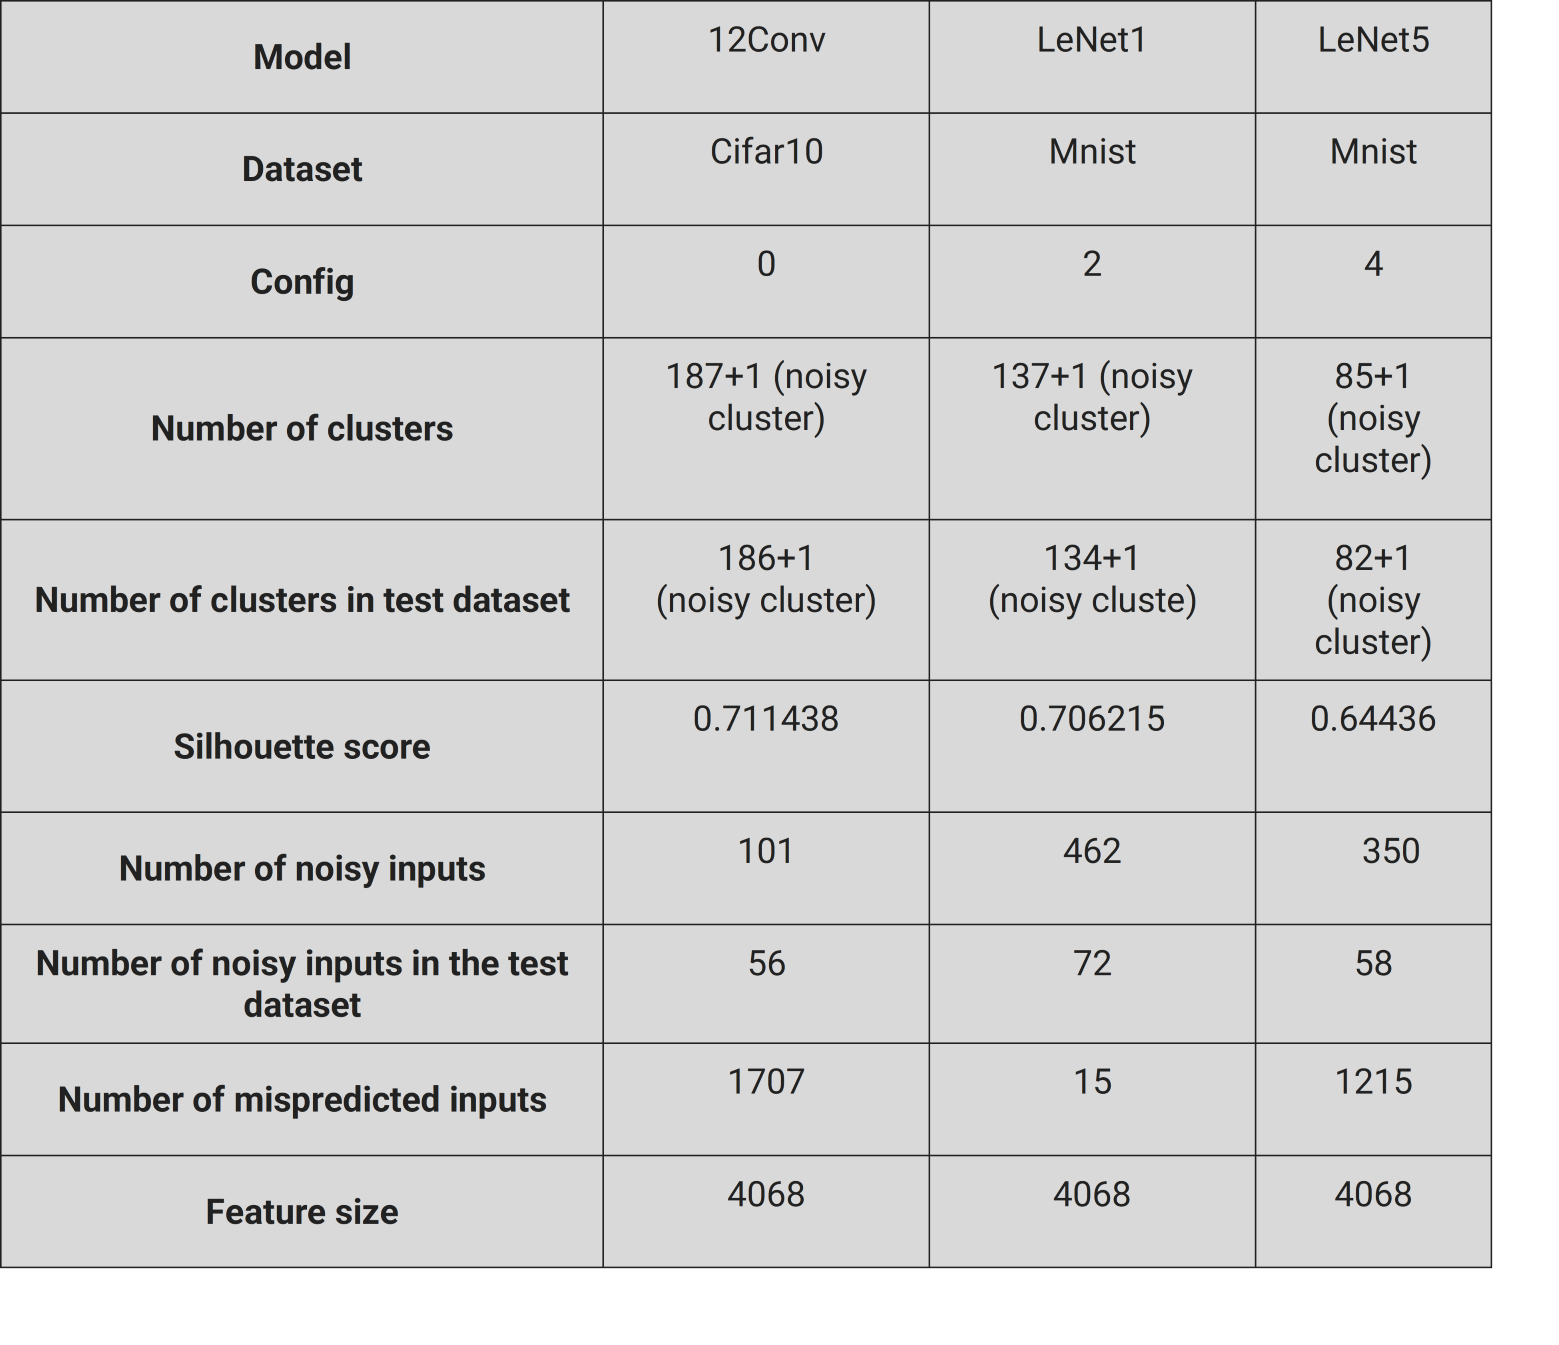

In [ ]:
noisy_index=[]
sss=[]
for i in range(len(mis_ind_test)):
  sss.append(Clustering_labels[i])
  if Clustering_labels[i]==-1:
    noisy_index.append(mis_ind_test[i])
sett=list(range(0, len(x_test)))
index_withoutnoisy=set(sett)-set(noisy_index)

# **Baseline methods**

## ATS

In [ ]:
!pwd
import os
os.chdir(str(Your_google_drive_path)+'/ATS-master_final')
!pwd

/content/drive/MyDrive/sadl11
/content/drive/MyDrive/A_Paper2/ATS-master_final


In [ ]:
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=0'
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=1'
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=2'
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=3'
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=4'
!python demo.py '--d=Cifar10' '--m=ResNet20'  '--ID=5'

In [ ]:

Size=500
hh=0
Name_method="ATS"
for IDD in {1,5,9}:
  xx=np.load(str(Your_google_drive_path)+"/ATS-master_final/Final_subsets_baseline/" +str(data_name) +"_"+str(model_name)+"/X_1000_"+str(IDD)+".npy")
  yy=np.load(str(Your_google_drive_path)+"/ATS-master_final/Final_subsets_baseline/" +str(data_name) +"_"+str(model_name)+"/Y_1000_"+str(IDD)+".npy")
  indexx=np.load(str(Your_google_drive_path)+"/ATS-master_final/Final_subsets_baseline/" +str(data_name) +"_"+str(model_name)+"/Index_1000_"+str(IDD)+".npy")
  print(faults(Size,indexx[:Size], mis_ind_test))
  hh=hh+1
# xx

## **Random selection baseline** 

In [ ]:
Num_F_RS=[]
Num_M_RS=[]
Size=100
for i in range(10):
  hh=random.sample(index_withoutnoisy,Size)
  _,r1,r2= faults(Size,hh)
  Num_F_RS.append(r1)
  Num_M_RS.append(r2)


In [ ]:
print("Average number of faults",sum(Num_F_RS)/len(Num_F_RS))
print("Average number of mispredicted inputs",sum(Num_M_RS)/len(Num_M_RS))


46.9
72.2


## **Gini selection baseline**
best subset based on gini score

In [ ]:

print(max(Gini_scores))
Size=300
sorted_index_array = np.argsort(Gini_scores)
A=list(sorted_index_array)
A = [i for i in A if i not in noisy_index]
sum=0
hh=0
# sorted array
for i in A[len(A)-Size:]:
   sum=Gini_scores[i]+sum
   hh=hh+1
print(hh)
print(sum/Size)
faults(Size, A[len(A)-Size:], mis_ind_test)
subset=A[len(A)-Size:]

0.8282263773293703
300
0.652054251640041


In [ ]:
Name_method="GINI"
################################### Example of loading Gini results:###############################################
# selected_subset_Indexes=np.load(str(Your_google_drive_path)+"/Baseline_results/GINI/Fashion_mnist_LeNet4/Subset100_GINI.npy")

# **MaxP**

##Save

In [ ]:
MaxP=np.max(Output_probability, axis=1)
Name_method="MaxP"
j=0
MaxP_ID=[]
for i in MaxP:
  MaxP_ID.append((i,j))
  j=j+1

## Load

In [ ]:
Name_method="MaxP"
################################### Example of loading MaxP results:###############################################
# MaxP=np.load("str(Your_google_drive_path)+"/Baseline_results/"+str(Name_method)+"/"+ str(data_name)+"_"+str(model_name)+"/allscores_"+str(Name_method)+".npy")

Size=100

#This sort is different with others : here we would like to have the least confidence scores( sort from lowest to highest)
sorted_li = sorted(MaxP, key=lambda x:x[0], reverse= False)
print(sorted_li)
subset=[]
for item in list(sorted_li):
  if item[1] in noisy_index:
    continue 
  else:
    subset.append(int(item[1]))
  if len(subset)==Size:
    break
print(faults(Size, subset, mis_ind_test))

[array([3.39167565e-01, 2.57320000e+04]), array([3.40651453e-01, 1.24860000e+04]), array([3.52150619e-01, 1.43940000e+04]), array([3.69153023e-01, 1.47910000e+04]), array([3.76095623e-01, 1.23800000e+04]), array([4.01665181e-01, 2.45190000e+04]), array([4.02261674e-01, 1.07230000e+04]), array([4.03337479e-01, 9.81300000e+03]), array([4.0740177e-01, 1.6855000e+04]), array([4.11976069e-01, 2.24900000e+04]), array([4.19508964e-01, 1.39490000e+04]), array([4.34684157e-01, 1.51320000e+04]), array([4.3471539e-01, 1.5831000e+04]), array([4.40075666e-01, 9.56700000e+03]), array([4.44645107e-01, 2.00920000e+04]), array([4.45274144e-01, 1.20000000e+04]), array([4.47200567e-01, 2.21010000e+04]), array([4.48511034e-01, 1.51020000e+04]), array([4.59252268e-01, 2.07960000e+04]), array([4.59883451e-01, 2.16760000e+04]), array([4.6060276e-01, 2.0124000e+04]), array([4.68104035e-01, 2.46510000e+04]), array([4.70265329e-01, 1.56500000e+03]), array([4.71191704e-01, 7.42400000e+03]), array([4.75368708e-01

#**LSA/DSA**

### Required setting for White-Box LSC and DSC metrics


In [ ]:
!pwd
import os
os.chdir(str(Your_google_drive_path)+"/LSA_DSA")
!pwd

!pip install -r requirements.txt

In [ ]:
# You can try other desired layers for each of combinations of models and datasets.

model.save(str(Your_google_drive_path)+"/LSA_DSA/model/model_Cov.h5")
if data_name == "cifar10":
  dn="cifar"
  if model_name=="ResNet20":
    Pth="cifar_test_activation_58_ats.npy"
    layer_names=["activation_58"]
  np.save(str(Your_google_drive_path)+"/LSA_DSA/layer_names.npy",layer_names)
    
if data_name == "Fashion_mnist":
  dn="Fashion_mnist"
  Pth="Fashion_mnist_test_conv2d_1_ats.npy"
  layer_names = ["conv2d_1"]
  np.save(str(Your_google_drive_path)+"/LSA_DSA/layer_names.npy",layer_names)

if data_name == "SVHN":
  dn="SVHN"
  Pth="SVHN_test_conv2d_1_ats.npy"
  layer_names = ["conv2d_1"]
  np.save(str(Your_google_drive_path)+"/LSA_DSA/layer_names.npy",layer_names)


### LSC and DSC functions

In [ ]:

#________________________________________________(DSC and LSC functions)___________________________________________________________
#It takes the selected subset and compute the DSC score and the computation time of it

#______________Input: Subset of test dataset (images)
#______________Output: 1- DSC score (DSC_score) or LSC score (LSC_score)
#______________________2- Execution time of DSC and LSC (timeDSC, time LSC)
#Note: you can change the upper bound and the number of buckets (LSC's and DSC's hyperparameters)

def DSC(input):
  np.save(str(Your_google_drive_path)+"/LSA_DSA/tmp/x_tcovdsc.npy",input)
  start_time = time.perf_counter()
  if data_name == "cifar10":
    !python run.py -dsa '--d=cifar' '--upper_bound=2'  '--n_bucket=1000'
  if data_name == "Fashion_mnist":
    !python run.py -dsa '--d=Fashion_mnist' '--upper_bound=2'  '--n_bucket=1000'
  if data_name == "SVHN":
    !python run.py -dsa '--d=SVHN' '--upper_bound=2'  '--n_bucket=1000'

  DSC_score=np.load(str(Your_google_drive_path)+"/LSA_DSA/tmp/DSC_cov.npy")
  DSA_score=np.load(str(Your_google_drive_path)+"/LSA_DSA/tmp/test_dsa.npy")

  end_time = time.perf_counter()
  print("DSC score",DSC_score)
  print('time taken to run:',end_time-start_time)
  timeDSC=end_time-start_time
  os.remove(str(Your_google_drive_path)+"/LSA_DSA/tmp/x_tcovdsc.npy")
  os.remove(str(Your_google_drive_path)+"/LSA_DSA/tmp/DSC_cov.npy")
  os.remove(str(Your_google_drive_path)+'/LSA_DSA/tmp/'+ str(Pth))
  os.remove(str(Your_google_drive_path)+'/LSA_DSA/tmp/'+ str(dn)+'_test_pred.npy')
  return DSA_score, DSC_score,timeDSC

def LSC(input):
  np.save(str(Your_google_drive_path)+"/LSA_DSA/tmp/x_tcovlsc.npy",input)
  start_time = time.perf_counter()
  if data_name == "cifar10":
    !python run.py -lsa '--d=cifar' '--upper_bound=100'  '--n_bucket=1000'
  if data_name == "Fashion_mnist":
    !python run.py -lsa '--d=fashion_mnist' '--upper_bound=100'  '--n_bucket=1000'
  if data_name == "SVHN":
    !python run.py -lsa '--d=SVHN' '--upper_bound=100'  '--n_bucket=1000'
  
  LSC_score=np.load(str(Your_google_drive_path)+"/LSA_DSA/tmp/test_cov.npy")
  LSA_score=np.load(str(Your_google_drive_path)+"/LSA_DSA/tmp/test_lsa.npy")
  end_time = time.perf_counter()
  print('time taken to run:',end_time-start_time)
  timeLSC=end_time-start_time
  print("####################### LSC_score ###############################",LSC_score)
  os.remove(str(Your_google_drive_path)+"/LSA_DSA/tmp/test_cov.npy")
  os.remove(str(Your_google_drive_path)+"/LSA_DSA/tmp/x_tcovlsc.npy")
  os.remove(str(Your_google_drive_path)+'/LSA_DSA/tmp/'+str(Pth))
  os.remove(str(Your_google_drive_path)+'/LSA_DSA/tmp/'+str(dn)+'_test_pred.npy')
  return LSA_score, LSC_score,timeLSC

In [ ]:
lsa_score, LSC_score, t1=LSC(x_test)

Namespace(batch_size=128, d='mnist', dsa=False, is_classification=True, lsa=True, n_bucket=1000, num_classes=10, save_path='./tmp/', target='fgsm', upper_bound=2000, var_threshold=1e-05)
2023-01-06 16:39:50.378536: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[train] Model serving
469/469 [==============================] - 1s 1ms/step
[train] Processing ATs
Layer: max_pooling2d_4
train ATs is saved at ./tmp/mnist_train_max_pooling2d_4_ats.npy
[test] Model serving
79/79 [==============================] - 0s 2ms/step
[test] Processing ATs
Layer: max_pooling2d_4
test ATs is saved at ./tmp/mnist_test_max_pooling2d_4_ats.npy
kde: 100% 10/10 [00:00<00:00, 698.83it/s]
The number of removed columns: 0
[test] Fetching LSA
100% 10000/10000 [00:06<00:00, 1597.54it/s]
args.upper_bound, args.n_bucket 2000 1000
test LSC coverage: 1.4000000000000001
time taken

In [ ]:
Name_method="LSA"

In [ ]:
j=0
Name_method="LSA"
Size=500
fs=[]
for i in lsa_score:
  fs.append((i,j))
  j=j+1
sorted_li = sorted(fs, key=lambda x:x[0], reverse= True)
b=noisy_index
print(sorted_li)
subset=[]

for item in list(sorted_li):
  if item[1] in b:
    continue 
  else:
    subset.append(int(item[1]))
  if len(subset)==Size:
    break
print(faults(Size, subset, mis_ind_test))

In [ ]:
dsa_score, C2, t2=DSC(x_test)

In [ ]:

Name_method="DSA"

In [ ]:
j=0
Name_method="DSA"
ds=[]
for i in dsa_score:
  ds.append((i,j))
  j=j+1
sorted_li_ds = sorted(ds, key=lambda x:x[0], reverse= True)
b=noisy_index
print(sorted_li_ds)
subset=[]
Size=100
for item in list(sorted_li_ds):
#if id is in noisy inputs
  if item[1] in b:
    continue 
  else:
    subset.append(int(item[1]))
  if len(subset)==Size:
    break
print(faults(Size, subset, mis_ind_test))

[(9.376258, 2118), (7.47626, 5642), (7.1366677, 324), (7.067044, 6894), (6.4379616, 221), (6.2407813, 9726), (6.1535697, 610), (5.8097672, 3540), (5.4194746, 4269), (5.29132, 3817), (4.9886675, 7451), (4.972855, 1938), (4.932873, 1191), (4.9008384, 5736), (4.7547903, 543), (4.742456, 2988), (4.713193, 8788), (4.7043567, 1494), (4.7001853, 1607), (4.6815395, 4679), (4.6632814, 4344), (4.620096, 3269), (4.516438, 8423), (4.47305, 4748), (4.4621444, 8115), (4.356114, 6289), (4.350593, 5268), (4.3167667, 1102), (4.288779, 5457), (4.285154, 7978), (4.276243, 938), (4.265647, 4127), (4.2589283, 4205), (4.2236786, 4289), (4.1272798, 6745), (4.1264143, 4403), (4.1135907, 1855), (4.0691786, 1125), (4.0643554, 7214), (4.034764, 9698), (4.006055, 1444), (3.975886, 6773), (3.9426234, 9012), (3.9310522, 2222), (3.930062, 5331), (3.9214084, 6721), (3.895734, 1391), (3.8627982, 9700), (3.8480437, 2280), (3.8396125, 2387), (3.7967286, 9257), (3.7890396, 6896), (3.7553787, 8213), (3.751041, 2116), (3.7

# Coverage **metrics**

In [ ]:
#REFERENCE
#/***************************************************************************************
#*    Title: <Revisiting Neuron Coverage Metrics and Quality of Deep Neural Networks>
#*    Author: <"Zhou Yang", "Jieke Shi", "Muhammad Hilmi Asyrofi", "David Lo", "Sina Samangooei", "David Dupplaw">
#*    Date: <1/06/2022>
#*    Code version: <code version>
#*    Availability: <"https://github.com/soarsmu/Revisiting_Neuron_Coverage/blob/master/Correlation/coverage.py")>
#*
#***************************************************************************************/



# helper function
def get_layer_i_output(model, i, data):
    layer_model = K.function([model.layers[0].input], [model.layers[i].output])
    ret = layer_model([data])[0]
    num = data.shape[0]
    ret = np.reshape(ret, (num, -1))
    return ret


class Coverage:
    def __init__(self, model, x_train, y_train, x_test, y_test, x_adv):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.x_adv = x_adv

    # find scale factors and min num
    def scale(self, layers, batch=1024):
        data_num = self.x_adv.shape[0]
        factors = dict()
        for i in layers:
            begin, end = 0, batch
            max_num, min_num = np.NINF, np.inf
            while begin < data_num:
                layer_output = get_layer_i_output(self.model, i, self.x_adv[begin:end])
                tmp = layer_output.max()
                max_num = tmp if tmp > max_num else max_num
                tmp = layer_output.min()
                min_num = tmp if tmp < min_num else min_num
                begin += batch
                end += batch
            factors[i] = (max_num - min_num, min_num)
        return factors

    # 1 Neuron Coverage T=0
    def NC(self, layers, threshold , batch=1024):
        factors = self.scale(layers, batch=batch)
        neuron_num = 0
        for i in layers:
            out_shape = self.model.layers[i].output.shape
            neuron_num += np.prod(out_shape[1:])
        neuron_num = int(neuron_num)

        activate_num = 0
        data_num = self.x_adv.shape[0]
        for i in layers:
            neurons = np.prod(self.model.layers[i].output.shape[1:])
            buckets = np.zeros(neurons).astype('bool')
            begin, end = 0, batch
            while begin < data_num:
                layer_output = get_layer_i_output(self.model, i, self.x_adv[begin:end])
                # scale the layer output to (0, 1)
                layer_output -= factors[i][1]
                layer_output /= factors[i][0]
                col_max = np.max(layer_output, axis=0)
                begin += batch
                end += batch
                buckets[col_max > threshold] = True
            activate_num += np.sum(buckets)
        # print('NC:\t{:.3f} activate_num:\t{} neuron_num:\t{}'.format(activate_num / neuron_num, activate_num, neuron_num))
        return activate_num / neuron_num, activate_num, neuron_num
   
    # 2 k-multisection neuron coverage, neuron boundary coverage and strong activation neuron coverage
    def KMNC(self, layers, k, t, batch=1024):
        neuron_num = 0
        for i in layers:
            out_shape = self.model.layers[i].output.shape
            neuron_num += np.prod(out_shape[1:])
        neuron_num = int(neuron_num)

        covered_num = 0
        l_covered_num = 0
        u_covered_num = 0
        for i in layers:
            neurons = np.prod(self.model.layers[i].output.shape[1:])
            # print(neurons)
            begin, end = 0, batch
            data_num = self.x_train.shape[0]

            neuron_max = np.full(neurons, np.NINF).astype('float')
            neuron_min = np.full(neurons, np.inf).astype('float')
            while begin < data_num:
                layer_output_train = get_layer_i_output(self.model, i, self.x_train[begin:end])
                batch_neuron_max = np.max(layer_output_train, axis=0)
                batch_neuron_min = np.min(layer_output_train, axis=0)
                neuron_max = np.maximum(batch_neuron_max, neuron_max)
                neuron_min = np.minimum(batch_neuron_min, neuron_min)
                begin += batch
                end += batch
            buckets = np.zeros((neurons, k + 2)).astype('bool')
            interval = (neuron_max - neuron_min) / k
            # print(interval[8], neuron_max[8], neuron_min[8])
            begin, end = 0, batch
            data_num = self.x_adv.shape[0]
            # print("nuron min", neuron_min,"LLLL" ,interval)
            while begin < data_num:
                layer_output_adv = get_layer_i_output(model, i, self.x_adv[begin: end])
                layer_output_adv -= neuron_min
                layer_output_adv /= (interval + 10 ** (-100))
                layer_output_adv[layer_output_adv < (0.- t)] = -1
                layer_output_adv[layer_output_adv >= (k / 1.0 + t)] = k
                layer_output_adv = layer_output_adv.astype('int')
                # index 0 for lower, 1 to k for between, k + 1 for upper
                layer_output_adv = layer_output_adv + 1
                for j in range(neurons):
                    uniq = np.unique(layer_output_adv[:, j])
                    # print("LLLKKKK",layer_output_adv[:, j])
                    
                    # print("eeeeeeeeeeee",buckets[j, uniq], uniq)
                    buckets[j, uniq] = True
                begin += batch
                end += batch
            # print("buckets", buckets[:, 1:-1], buckets.shape)
            # print("LLLLLLLL", buckets[0], buckets[0].shape)
            covered_num += np.sum(buckets[:, 1:-1])
            u_covered_num += np.sum(buckets[:, -1])
            l_covered_num += np.sum(buckets[:, 0])
        # print('KMNC:\t{:.3f} covered_num:\t{}'.format(covered_num / (neuron_num * k), covered_num))
        # print(
        #     'NBC:\t{:.3f} l_covered_num:\t{}'.format((l_covered_num + u_covered_num) / (neuron_num * 2), l_covered_num))
        # print('SNAC:\t{:.3f} u_covered_num:\t{}'.format(u_covered_num / neuron_num, u_covered_num))
        return covered_num / (neuron_num * k), (l_covered_num + u_covered_num) / (
                    neuron_num * 2), u_covered_num / neuron_num, covered_num, l_covered_num, u_covered_num, neuron_num * k

    # 4 top-k neuron coverage
    def TKNC(self, layers, k, batch=1024):
        def top_k(x, k):
            ind = np.argpartition(x, -k)[-k:]
            return ind[np.argsort((-x)[ind])]

        neuron_num = 0
        for i in layers:
            out_shape = self.model.layers[i].output.shape
            neuron_num += np.prod(out_shape[1:])
        neuron_num = int(neuron_num)

        pattern_num = 0
        data_num = self.x_adv.shape[0]
        for i in layers:
            pattern_set = set()
            begin, end = 0, batch
            while begin < data_num:
                layer_output = get_layer_i_output(self.model, i, self.x_adv[begin:end])
                topk = np.argpartition(layer_output, -k, axis=1)[:, -k:]
                topk = np.sort(topk, axis=1)
                # or in order
                # topk = np.apply_along_axis[lambda x: top_k(layer_output, k), 1, layer_output]
                for j in range(topk.shape[0]):
                    pattern_set.add(tuple(topk[j]))
                begin += batch
                end += batch
            pattern_num += len(pattern_set)
        # print(
        #     'TKNC:\t{:.3f} pattern_num:\t{} neuron_num:\t{}'.format(pattern_num / neuron_num, pattern_num, neuron_num))
        return pattern_num / neuron_num, pattern_num, neuron_num

    # 4 top-k neuron patterns
    def TKNP(self, layers, k=3, batch=1024):
        def top_k(x, k):
            ind = np.argpartition(x, -k)[-k:]
            return ind[np.argsort((-x)[ind])]

        def to_tuple(x):
            l = list()
            for row in x:
                l.append(tuple(row))
            return tuple(l)

        pattern_set = set()
        layer_num = len(layers)
        data_num = self.x_adv.shape[0]
        patterns = np.zeros((data_num, layer_num, k))
        layer_cnt = 0
        for i in layers:
            neurons = np.prod(self.model.layers[i].output.shape[1:])
            begin, end = 0, batch
            while begin < data_num:
                layer_output = get_layer_i_output(self.model, i, self.x_adv[begin:end])
                topk = np.argpartition(layer_output, -k, axis=1)[:, -k:]
                topk = np.sort(topk, axis=1)
                # or in order
                # topk = np.apply_along_axis[lambda x: top_k(layer_output, k), 1, layer_output]
                patterns[begin:end, layer_cnt, :] = topk
                begin += batch
                end += batch
            layer_cnt += 1

        for i in range(patterns.shape[0]):
            pattern_set.add(to_tuple(patterns[i]))
        pattern_num = len(pattern_set)
        print('TKNP:\t{:.3f}'.format(pattern_num))
        return pattern_num

    def all(self, layers, batch=100):
        self.NC(layers, batch=batch)
        self.KMNC(layers, batch=batch)
        self.TKNC(layers, batch=batch)
        self.TKNP(layers, batch=batch)


# **CTM**

In [ ]:
kmnc_1000_scores=[]
kmnc_10000_scores=[]

nbc0_scores=[]
snac0_scores=[]
nbc05_scores=[]
snac05_scores=[]
nbc1_scores=[]
snac1_scores=[]

tknc_1_scores=[]
tknc_2_scores=[]
tknc_3_scores=[]

nc_0_scores=[]
nc_075_scores=[]

model_layer = len(model.layers)
lay = range(model_layer)

for i in range(len(x_test)):
  coverage = Coverage(model, x_train, y_train, x_test, y_test, x_test[i:i+1])
  kmnc_1000, nbc0, snac0,_ , _,_,_= coverage.KMNC(lay, 1000, t=0.)
  _, nbc05, snac05,_ , _,_,_= coverage.KMNC(lay, 1000, t=0.5)
 
  # _, nbc1, snac1,_ , _,_,_= coverage.KMNC(lay, 1000, t=1.)
  # nc0,_ , _=coverage.NC(lay, 0.)
  # nc075,_ , _=coverage.NC(lay, 0.75)
  nbc0_scores.append((nbc0, i))
  snac0_scores.append((snac0, i))
  nbc05_scores.append((nbc05, i))
  snac05_scores.append((snac05, i))
  # nbc1_scores.append(nbc1, i)
  # snac1_scores.append(snac1, i) 
  # nc_0_scores.append(nc0, i)
  # nc_075_scores.append(nc075, i)
# print('KMNC: {} NBC: {} SNAC: {} TKNC: {} NC: {}'.format(kmnc, nbc, snac, tknc, nc_0))



<ipython-input-12-21dc64113437>:113: RuntimeWarning: overflow encountered in true_divide
  layer_output_adv /= (interval + 10 ** (-100))


In [ ]:
coverage = Coverage(model, x_train, y_train, x_test, y_test, x_test[100:110])
model_layer = len(model.layers)
lay = range(model_layer)
kmnc_1000, nbc1, snac2,_ , _,_,_= coverage.KMNC(lay, 1000)
nc_0,_ , _=coverage.NC_0(lay)
nc_075,_ , _=coverage.NC_075(lay)
nbc_scores.append(nbc)
snac_scores.append(snac)
tknc_2_scores.append(tknc)
nc_0_scores.append(nc_0)
nc_075_scores.append(nc_075)